<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Limpieza de datos</h1>
  <p></p>
</div>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from mlxtend.preprocessing import standardize
from scipy import stats

# Declaración de variables

In [2]:
organismo ="archaea"
dataset = 3
nombre = ("ds" + str(dataset) + "_" + str(organismo))
nombre2 = (str(organismo)+ " dataset " + str(dataset))
r2 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_filtrar")
r3 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_atipicos")

nom1 = ("/ds" + str(dataset) + "_AAC_efectores_" + str(organismo) + ".txt")
nom2 = ("/ds" + str(dataset) + "_ACC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom3 = ("/ds" + str(dataset) + "_ACC_mass_efectores_" + str(organismo) + ".txt")
nom4 = ("/ds" + str(dataset) + "_ACC_hidro_efectores_" + str(organismo) + ".txt")
nom5 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom6 = ("/ds" + str(dataset) + "_PseAAC_mass_efectores_" + str(organismo) + ".txt")
nom7 = ("/ds" + str(dataset) + "_PseAAC_hidro_efectores_" + str(organismo) + ".txt")

nom8 = ("/ds" + str(dataset) + "_AAC_no_efectores_" + str(organismo) + ".txt")
nom9 = ("/ds" + str(dataset) + "_ACC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom10 = ("/ds" + str(dataset) + "_ACC_mass_no_efectores_" + str(organismo) + ".txt")
nom11 = ("/ds" + str(dataset) + "_ACC_hidro_no_efectores_" + str(organismo) + ".txt")
nom12 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom13 = ("/ds" + str(dataset) + "_PseAAC_mass_no_efectores_" + str(organismo) + ".txt")
nom14 = ("/ds" + str(dataset) + "_PseAAC_hidro_no_efectores_" + str(organismo) + ".txt")

#Efectores
AAC_efec= pd.read_csv(str(r2) + str(nom1), header=None,prefix='X',sep=',')
ACC_hidro_mass_efec = pd.read_csv(str(r2) + str(nom2), header=None,prefix='X',sep=',')
ACC_mass_efec = pd.read_csv(str(r2) + str(nom3), header=None,prefix='X',sep=',')
ACC_hidro_efec = pd.read_csv(str(r2) + str(nom4), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_efec = pd.read_csv(str(r2) +str(nom5), header=None,prefix='X',sep=',')
PseAAC_mass_efec = pd.read_csv(str(r2) + str(nom6), header=None,prefix='X',sep=',')
PseAAC_hidro_efec = pd.read_csv(str(r2) + str(nom7), header=None,prefix='X',sep=',')

#No efectores
AAC_no_efec= pd.read_csv(str(r2) + str(nom8), header=None,prefix='X',sep=',')
ACC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom9), header=None,prefix='X',sep=',')
ACC_mass_no_efec =pd.read_csv(str(r2) + str(nom10), header=None,prefix='X',sep=',')
ACC_hidro_no_efec =pd.read_csv(str(r2) + str(nom11), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom12), header=None,prefix='X',sep=',')
PseAAC_mass_no_efec =pd.read_csv(str(r2) + str(nom13), header=None,prefix='X',sep=',')
PseAAC_hidro_no_efec =pd.read_csv(str(r2) + str(nom14), header=None,prefix='X',sep=',')

# Composición de aminoácidos (AAC)

efectores
Composición de aminoácidos (AAC) efectores archaea dataset 3, con valores atípicos.
Valores del documento csv.

         X0     X1     X2      X3     X4      X5     X6     X7     X8     X9  \
0     3.650  5.839  4.015   5.109  0.000   7.299  2.190  7.299  1.825  8.394   
1     6.250  8.125  1.875   4.375  0.625  13.125  1.250  7.500  0.000  6.250   
2     4.734  5.917  4.142   2.959  0.592  13.609  2.959  5.917  4.142  6.509   
3    13.744  5.687  1.896   5.687  0.000   3.318  1.896  8.057  2.370  1.422   
4     4.000  4.000  2.667  10.667  2.667   4.000  4.000  2.667  0.000  6.667   
..      ...    ...    ...     ...    ...     ...    ...    ...    ...    ...   
495  13.529  6.471  0.588   4.118  0.000   4.118  1.176  8.824  2.353  3.529   
496   3.448  5.517  4.138   4.828  2.759   7.586  5.517  4.828  0.000  4.138   
497   8.989  9.738  1.124   9.363  0.375  11.610  0.749  6.367  2.622  2.622   
498   6.706  4.082  6.997   6.997  0.000   7.289  2.915  4.665  1.166  8.163  

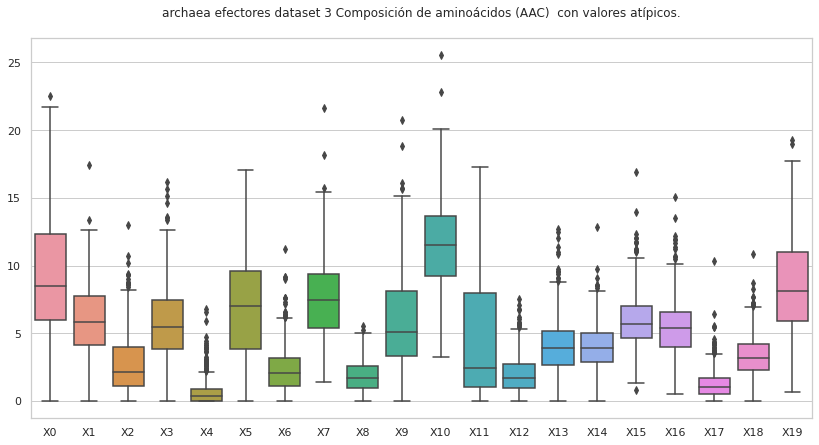

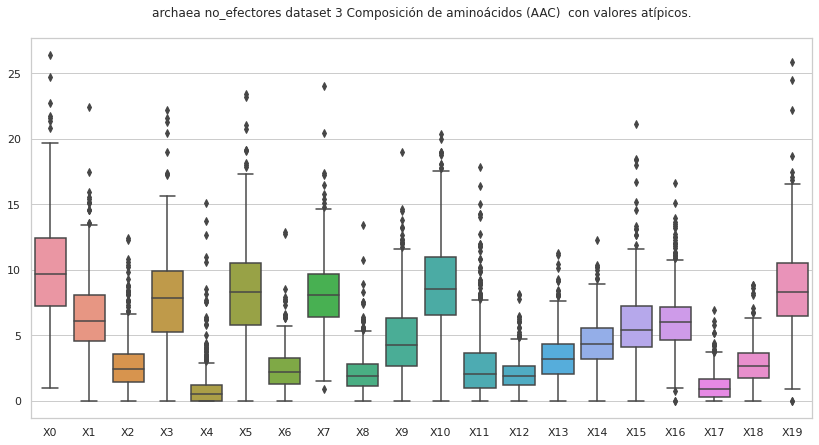

In [3]:
transf = "Composición de aminoácidos (AAC) "
etiq="efectores "
estado = "con valores atípicos.\n"
df=""

for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec    
    
    #del df['X20']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf)+" "+str(estado))

## Composición de aminoácidos (AAC), sin valores atípicos

efectores
Composición de aminoácidos (AAC) efectores archaea dataset 3, sin valores atípicos.
Valores del documento csv.

         X0     X1     X2      X3     X4      X5     X6     X7     X8     X9  \
0     3.650  5.839  4.015   5.109  0.000   7.299  2.190  7.299  1.825  8.394   
1     6.250  8.125  1.875   4.375  0.625  13.125  1.250  7.500  0.000  6.250   
2     4.734  5.917  4.142   2.959  0.592  13.609  2.959  5.917  4.142  6.509   
3    13.744  5.687  1.896   5.687  0.000   3.318  1.896  8.057  2.370  1.422   
4     4.000  4.000  2.667  10.667  2.667   4.000  4.000  2.667  0.000  6.667   
..      ...    ...    ...     ...    ...     ...    ...    ...    ...    ...   
495  13.529  6.471  0.588   4.118  0.000   4.118  1.176  8.824  2.353  3.529   
496   3.448  5.517  4.138   4.828  2.759   7.586  5.517  4.828  0.000  4.138   
497   8.989  9.738  1.124   9.363  0.375  11.610  0.749  6.367  2.622  2.622   
498   6.706  4.082  6.997   6.997  0.000   7.289  2.915  4.665  1.166  8.163  

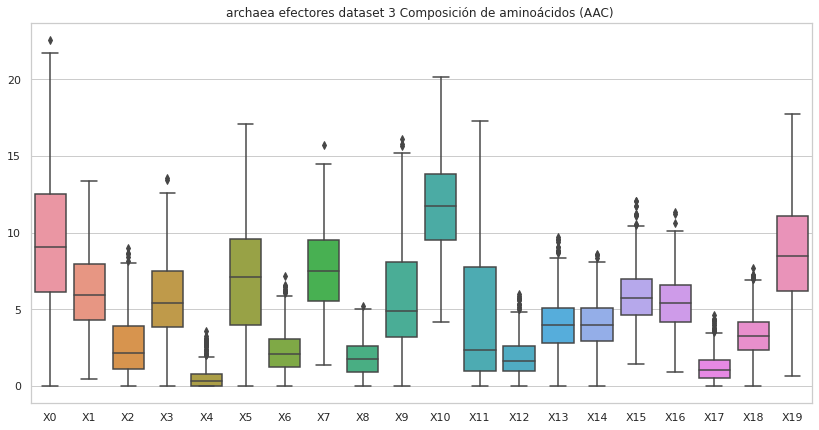

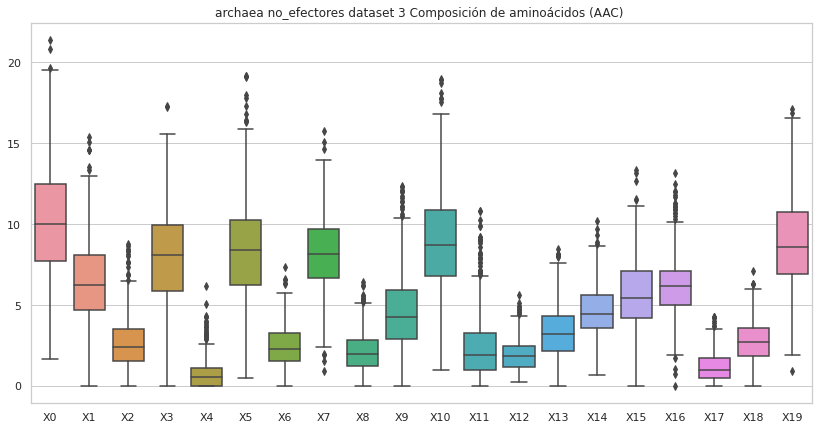

In [4]:
transf = "Composición de aminoácidos (AAC) "
estado = "sin valores atípicos.\n"
transf2="AAC"

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec   
    
    del df['X20']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])

    df['X20'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf))

# Composición de pseudo aminoácidos (PseAAC) hidro_mass

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores archaea dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.021378  0.000000  0.029929  0.042756  0.019240  0.042756  0.010689   
1    0.028068  0.002807  0.019648  0.058943  0.014034  0.033682  0.000000   
2    0.025200  0.003150  0.015750  0.072451  0.018900  0.031501  0.022050   
3    0.033746  0.000000  0.013964  0.008145  0.005818  0.019782  0.005818   
4    0.021105  0.014070  0.056279  0.021105  0.021105  0.014070  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.036886  0.000000  0.011226  0.011226  0.011226  0.024056  0.006415   
496  0.021883  0.017506  0.030636  0.048142  0.017506  0.030636  0.000000   
497  0.041233  0.001718  0.042951  0.053259  0.017180  0.029206  0.012026   
498  0.050157  0.000000  0.052337  0.054518  0.032711  0.034892  0.008723   
499  0.02

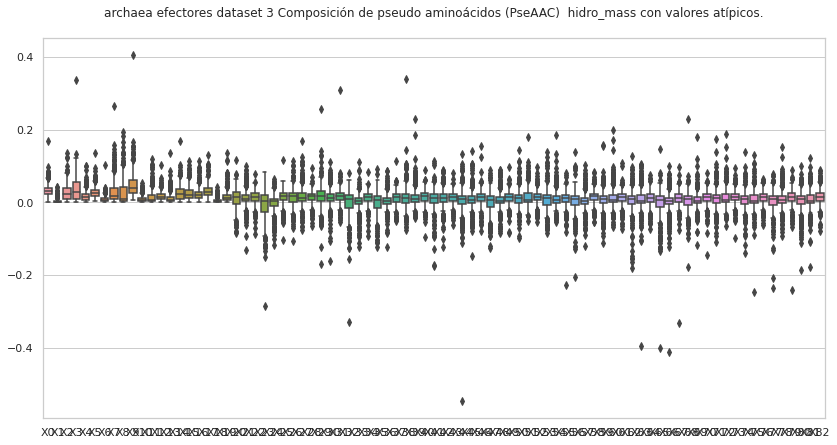

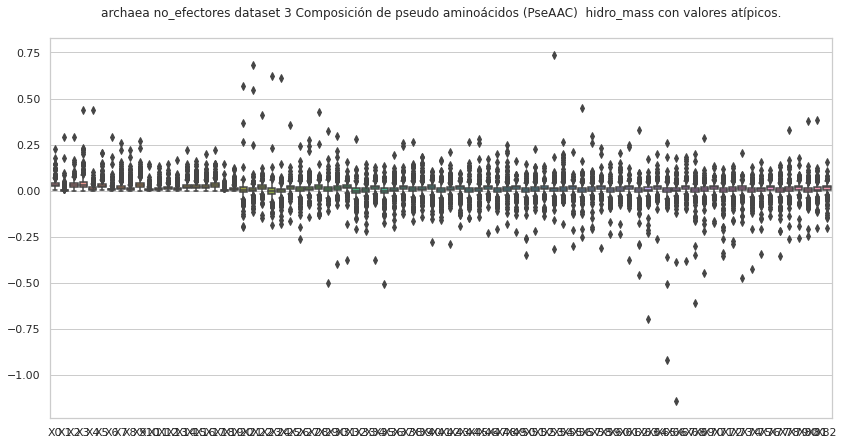

In [5]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    #del df['X83']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro_mass, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores archaea dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.021378  0.000000  0.029929  0.042756  0.019240  0.042756  0.010689   
1    0.028068  0.002807  0.019648  0.058943  0.014034  0.033682  0.000000   
2    0.025200  0.003150  0.015750  0.072451  0.018900  0.031501  0.022050   
3    0.033746  0.000000  0.013964  0.008145  0.005818  0.019782  0.005818   
5    0.033039  0.009440  0.029892  0.020453  0.018879  0.036185  0.014159   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.036886  0.000000  0.011226  0.011226  0.011226  0.024056  0.006415   
496  0.021883  0.017506  0.030636  0.048142  0.017506  0.030636  0.000000   
497  0.041233  0.001718  0.042951  0.053259  0.017180  0.029206  0.012026   
498  0.050157  0.000000  0.052337  0.054518  0.032711  0.034892  0.008723   
499  0.02

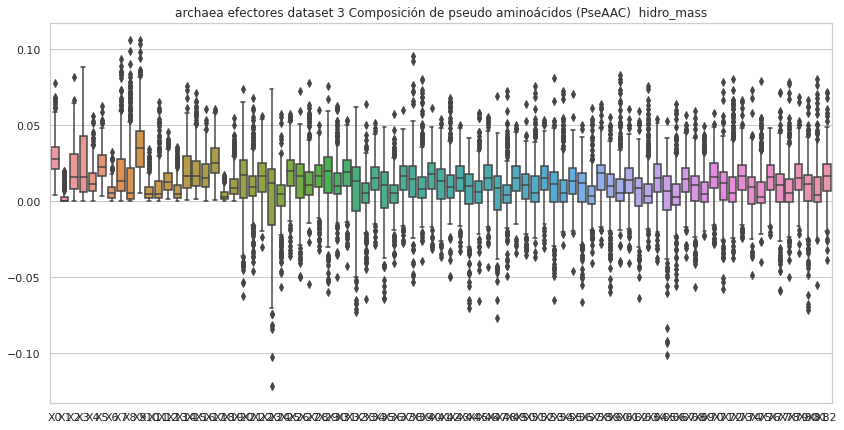

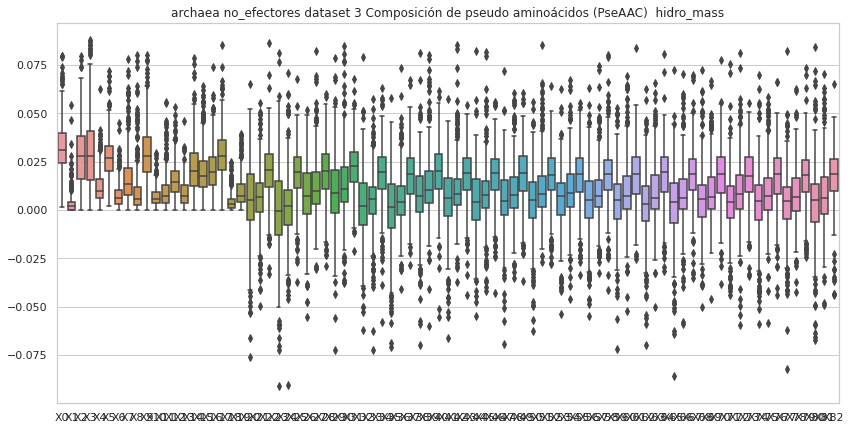

In [6]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    del df['X83']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X83'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) mass

efectores
Composición de pseudo aminoácidos (PseAAC)  mass efectores archaea dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.028365  0.000000  0.039710  0.056729  0.025528  0.056729  0.014182   
1    0.048566  0.004857  0.033996  0.101988  0.024283  0.058279  0.000000   
2    0.035954  0.004494  0.022471  0.103367  0.026965  0.044942  0.031459   
3    0.044550  0.000000  0.018435  0.010754  0.007681  0.026116  0.007681   
4    0.032878  0.021919  0.087676  0.032878  0.032878  0.021919  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.058034  0.000000  0.017663  0.017663  0.017663  0.037848  0.010093   
496  0.031065  0.024852  0.043491  0.068344  0.024852  0.043491  0.000000   
497  0.056822  0.002368  0.059190  0.073396  0.023676  0.040249  0.016573   
498  0.054515  0.000000  0.056886  0.059256  0.035554  0.037924  0.009481   
499  0.030767  

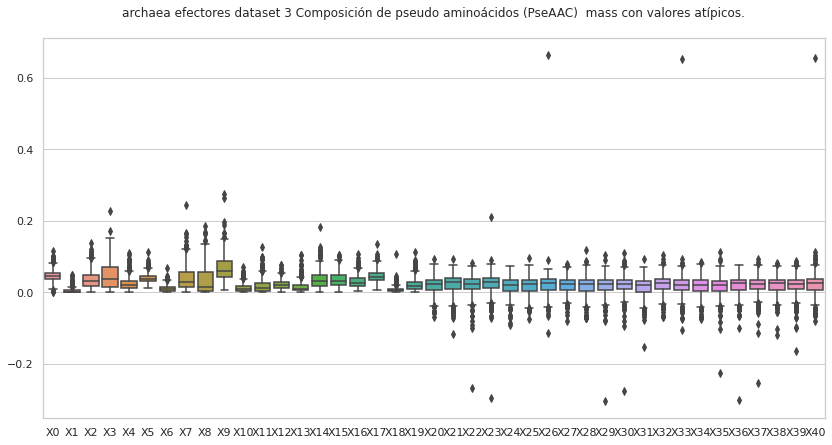

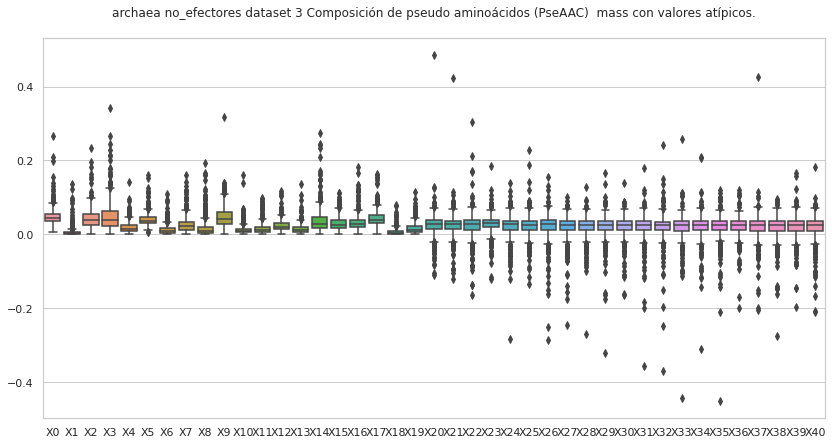

In [7]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    #del df['X41']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) mass, sin valores atípicos

Composición de pseudo aminoácidos (PseAAC)  mass efectores archaea dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.028365  0.000000  0.039710  0.056729  0.025528  0.056729  0.014182   
1    0.048566  0.004857  0.033996  0.101988  0.024283  0.058279  0.000000   
2    0.035954  0.004494  0.022471  0.103367  0.026965  0.044942  0.031459   
3    0.044550  0.000000  0.018435  0.010754  0.007681  0.026116  0.007681   
4    0.032878  0.021919  0.087676  0.032878  0.032878  0.021919  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.058034  0.000000  0.017663  0.017663  0.017663  0.037848  0.010093   
496  0.031065  0.024852  0.043491  0.068344  0.024852  0.043491  0.000000   
497  0.056822  0.002368  0.059190  0.073396  0.023676  0.040249  0.016573   
498  0.054515  0.000000  0.056886  0.059256  0.035554  0.037924  0.009481   
499  0.030767  0.002198  

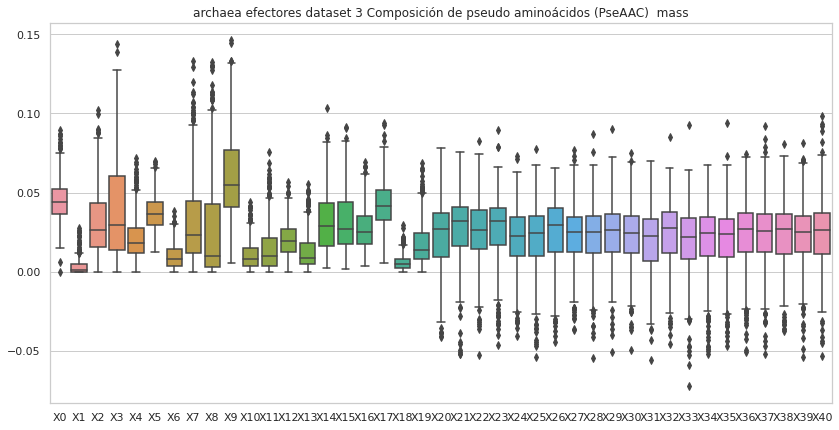

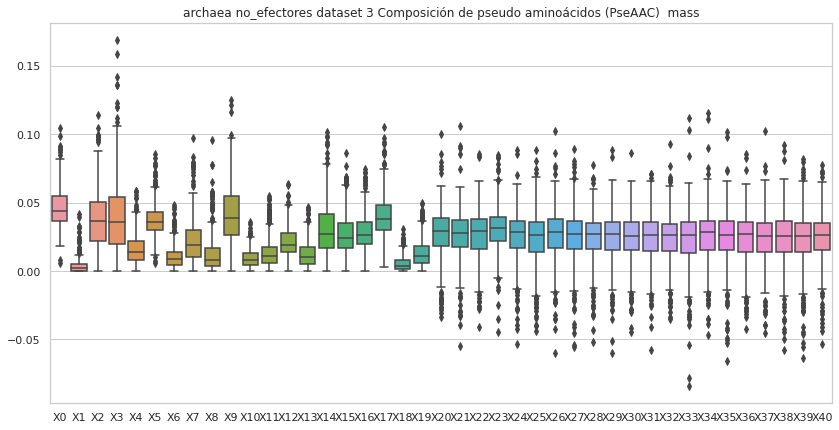

In [8]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    del df['X41']
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X41'] = etiq
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) hidro

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro efectores archaea dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.025692  0.000000  0.035969  0.051385  0.023123  0.051385  0.012846   
1    0.032220  0.003222  0.022554  0.067661  0.016110  0.038664  0.000000   
2    0.030309  0.003789  0.018943  0.087139  0.022732  0.037887  0.026521   
3    0.069143  0.000000  0.028611  0.016690  0.011921  0.040532  0.011921   
4    0.023828  0.015885  0.063541  0.023828  0.023828  0.015885  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.057901  0.000000  0.017622  0.017622  0.017622  0.037761  0.010070   
496  0.023525  0.018820  0.032935  0.051755  0.018820  0.032935  0.000000   
497  0.056246  0.002344  0.058590  0.072652  0.023436  0.039841  0.016405   
498  0.060580  0.000000  0.063214  0.065848  0.039509  0.042143  0.010536   
499  0.036186 

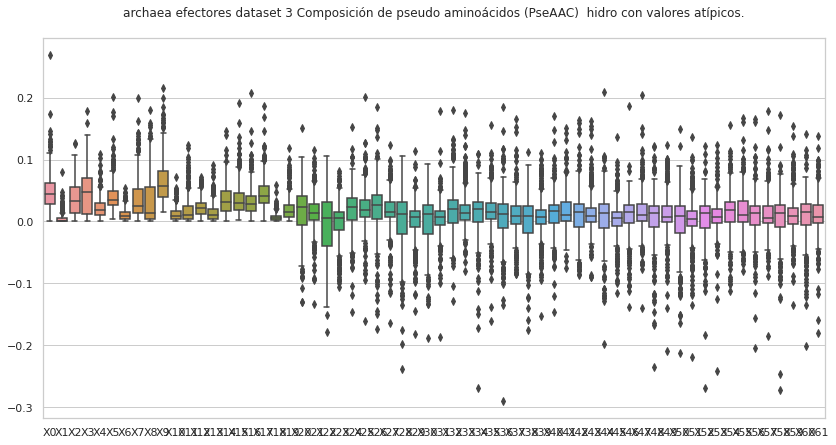

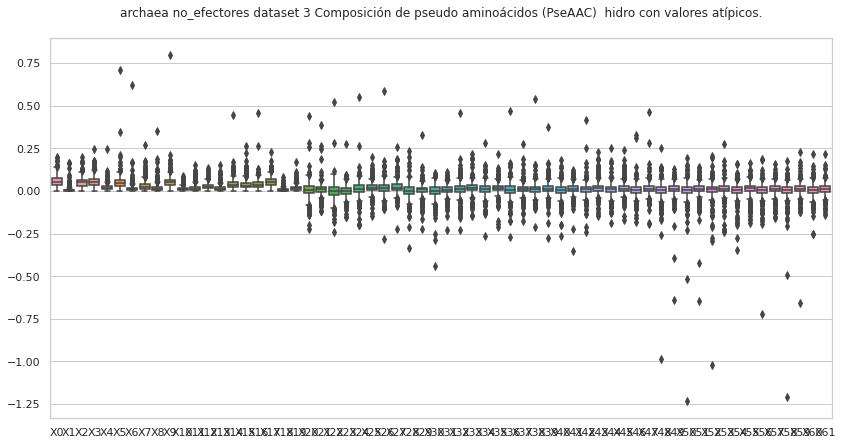

In [9]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    #del df['X62']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  efectores archaea dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.025692  0.000000  0.035969  0.051385  0.023123  0.051385  0.012846   
1    0.032220  0.003222  0.022554  0.067661  0.016110  0.038664  0.000000   
2    0.030309  0.003789  0.018943  0.087139  0.022732  0.037887  0.026521   
3    0.069143  0.000000  0.028611  0.016690  0.011921  0.040532  0.011921   
4    0.023828  0.015885  0.063541  0.023828  0.023828  0.015885  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
494  0.039364  0.017495  0.026242  0.078727  0.021869  0.030616  0.008747   
495  0.057901  0.000000  0.017622  0.017622  0.017622  0.037761  0.010070   
496  0.023525  0.018820  0.032935  0.051755  0.018820  0.032935  0.000000   
497  0.056246  0.002344  0.058590  0.072652  0.023436  0.039841  0.016405   
498  0.060580  0.000

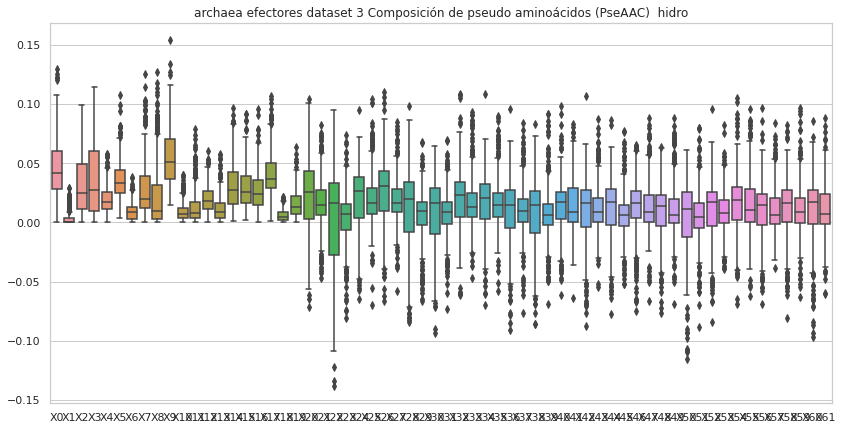

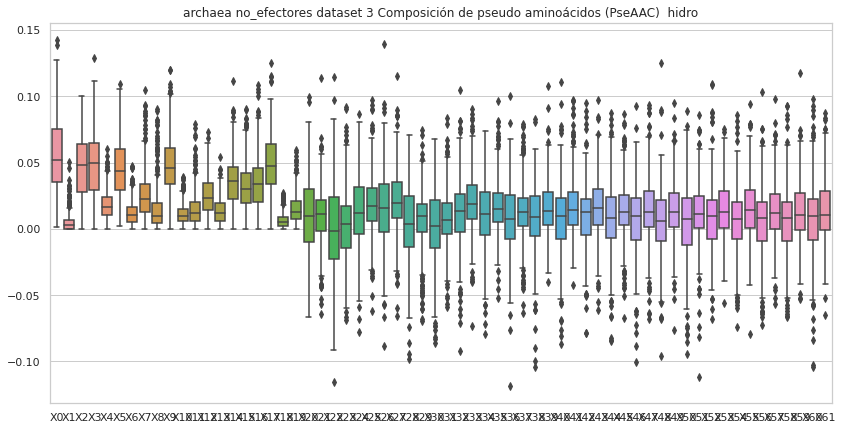

In [10]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    del df['X62']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X62'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro_mass

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores archaea dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.090577  0.116321 -0.044794  0.101101 -0.033592  0.007461 -0.097244   
1   -0.100065 -0.052556 -0.061478  0.027026  0.086400 -0.071144 -0.105030   
2    0.018098  0.008925  0.032485  0.022552  0.118641 -0.050163 -0.005134   
3    0.117153  0.083594  0.056243  0.062774 -0.038136 -0.015458 -0.014148   
4    0.078087 -0.015119 -0.006791 -0.070146 -0.031690 -0.000582 -0.014888   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.070786  0.098400 -0.045124  0.071631  0.020758 -0.115568  0.012798   
496  0.011383 -0.031248 -0.036010  0.032164 -0.107343 -0.045003  0.070823   
497 -0.044145 -0.022006 -0.038821 -0.119032  0.070035 -0.016466 -0.017405   
498 -0.057032  0.042631 -0.026448 -0.003339  0.052676 -0.078402  0.036407   
499  0.030194  

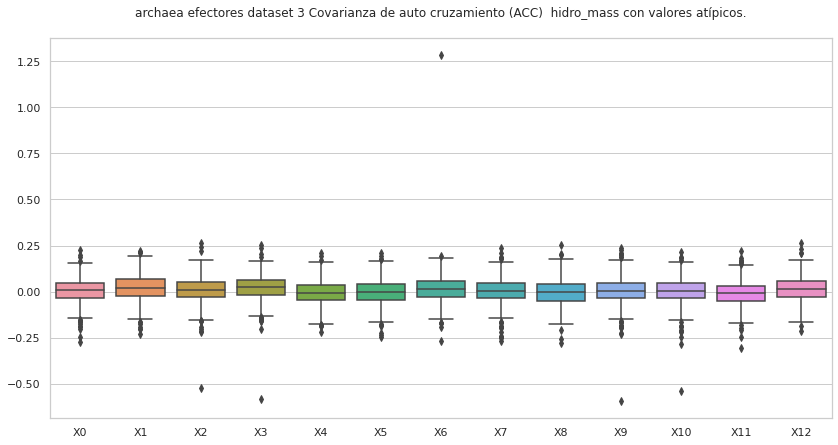

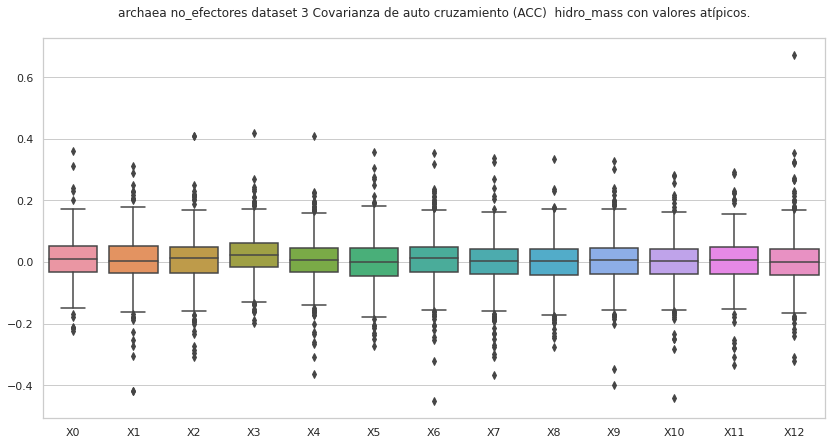

In [11]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro_mass, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores archaea dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.090577  0.116321 -0.044794  0.101101 -0.033592  0.007461 -0.097244   
1   -0.100065 -0.052556 -0.061478  0.027026  0.086400 -0.071144 -0.105030   
2    0.018098  0.008925  0.032485  0.022552  0.118641 -0.050163 -0.005134   
3    0.117153  0.083594  0.056243  0.062774 -0.038136 -0.015458 -0.014148   
4    0.078087 -0.015119 -0.006791 -0.070146 -0.031690 -0.000582 -0.014888   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.070786  0.098400 -0.045124  0.071631  0.020758 -0.115568  0.012798   
496  0.011383 -0.031248 -0.036010  0.032164 -0.107343 -0.045003  0.070823   
497 -0.044145 -0.022006 -0.038821 -0.119032  0.070035 -0.016466 -0.017405   
498 -0.057032  0.042631 -0.026448 -0.003339  0.052676 -0.078402  0.036407   
499  0.030194  

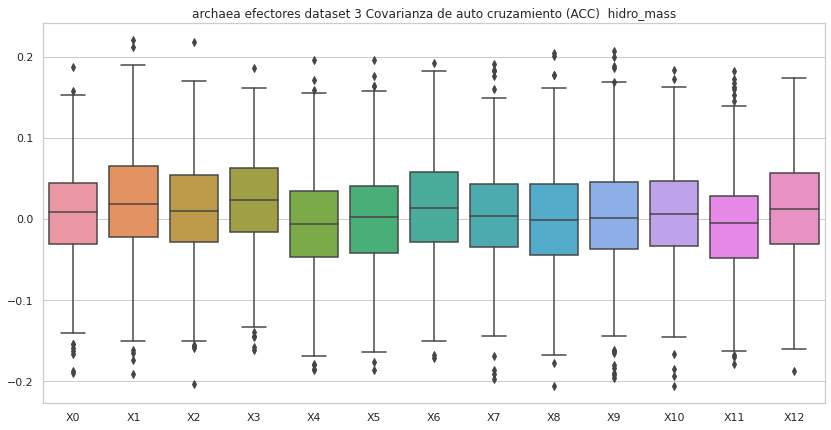

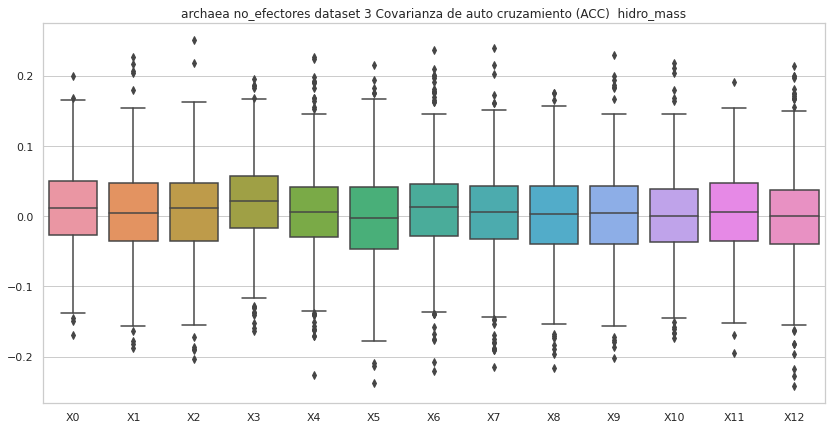

In [12]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) mass

efectores
Covarianza de auto cruzamiento (ACC)  mass efectores archaea dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.090577  0.116321 -0.044794  0.101101 -0.033592  0.007461 -0.097244   
1   -0.100065 -0.052556 -0.061478  0.027026  0.086400 -0.071144 -0.105030   
2    0.018098  0.008925  0.032485  0.022552  0.118641 -0.050163 -0.005134   
3    0.117153  0.083594  0.056243  0.062774 -0.038136 -0.015458 -0.014148   
4    0.078087 -0.015119 -0.006791 -0.070146 -0.031690 -0.000582 -0.014888   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.070786  0.098400 -0.045124  0.071631  0.020758 -0.115568  0.012798   
496  0.011383 -0.031248 -0.036010  0.032164 -0.107343 -0.045003  0.070823   
497 -0.044145 -0.022006 -0.038821 -0.119032  0.070035 -0.016466 -0.017405   
498 -0.057032  0.042631 -0.026448 -0.003339  0.052676 -0.078402  0.036407   
499  0.030194  0.0069

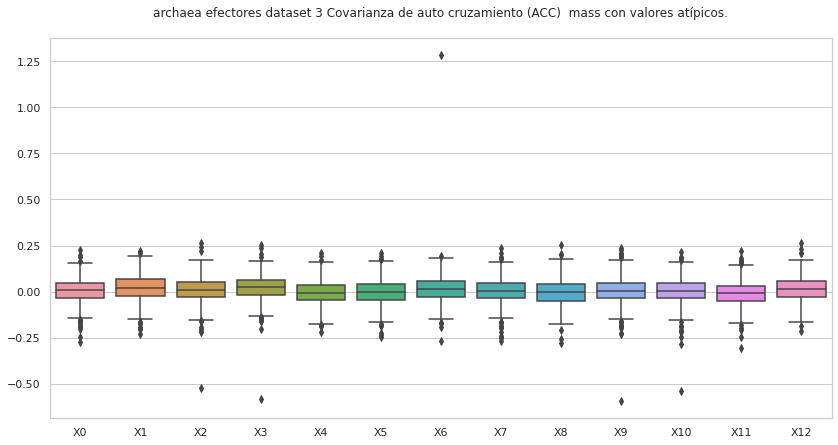

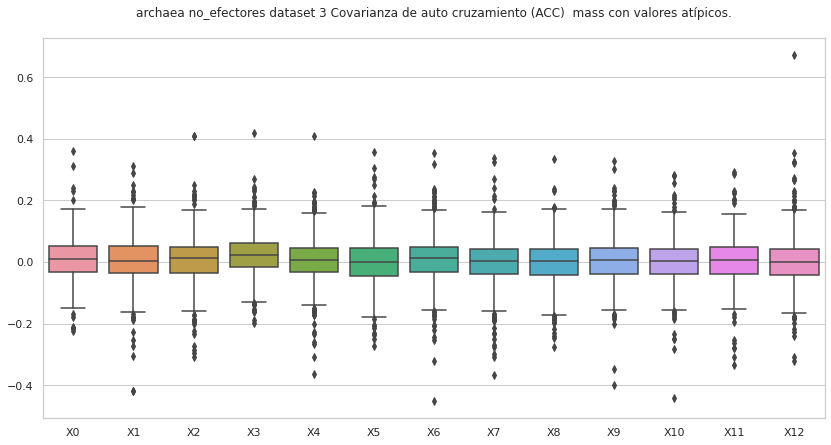

In [13]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) mass, sin valores atípicos

Covarianza de auto cruzamiento (ACC)  mass efectores archaea dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.090577  0.116321 -0.044794  0.101101 -0.033592  0.007461 -0.097244   
1   -0.100065 -0.052556 -0.061478  0.027026  0.086400 -0.071144 -0.105030   
2    0.018098  0.008925  0.032485  0.022552  0.118641 -0.050163 -0.005134   
3    0.117153  0.083594  0.056243  0.062774 -0.038136 -0.015458 -0.014148   
4    0.078087 -0.015119 -0.006791 -0.070146 -0.031690 -0.000582 -0.014888   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.070786  0.098400 -0.045124  0.071631  0.020758 -0.115568  0.012798   
496  0.011383 -0.031248 -0.036010  0.032164 -0.107343 -0.045003  0.070823   
497 -0.044145 -0.022006 -0.038821 -0.119032  0.070035 -0.016466 -0.017405   
498 -0.057032  0.042631 -0.026448 -0.003339  0.052676 -0.078402  0.036407   
499  0.030194  0.006911  0.0861

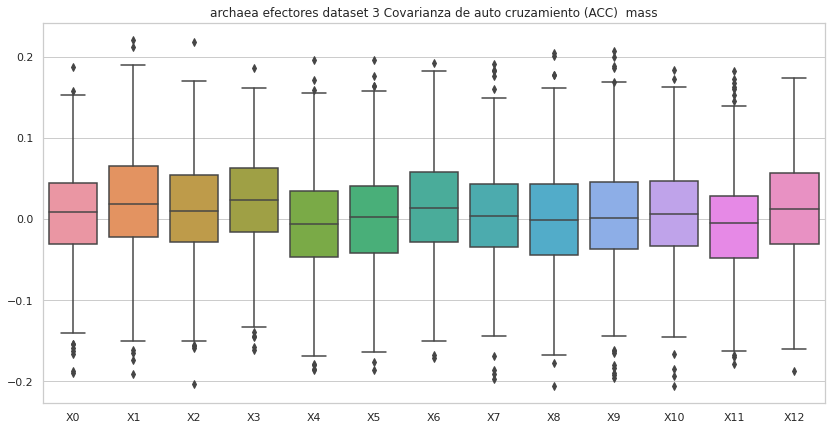

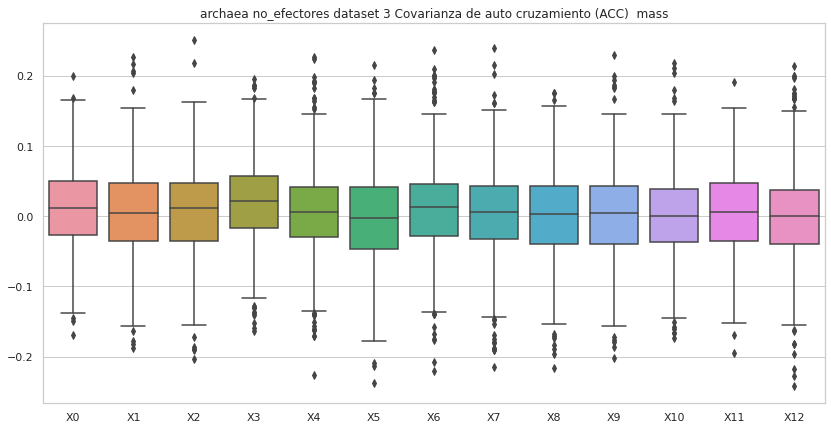

In [14]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

#Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro

efectores
Covarianza de auto cruzamiento (ACC)  hidro efectores archaea dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.001334 -0.078115  0.065274  0.059054 -0.148289  0.020244 -0.066984   
1   -0.209555 -0.165094  0.147335  0.109168 -0.132247 -0.013569  0.053576   
2    0.008769 -0.213234 -0.002806  0.128194 -0.084395 -0.096087  0.141392   
3    0.031119  0.011840  0.002290  0.084728  0.090296  0.085032 -0.005594   
4   -0.028848  0.118231 -0.197788 -0.077965 -0.162772  0.219492 -0.080919   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.086541  0.105521  0.169713  0.030004 -0.054771 -0.017605 -0.121119   
496 -0.110753 -0.126949 -0.009137  0.036818 -0.060854 -0.001347  0.112616   
497 -0.010647 -0.285446  0.014826  0.054012 -0.170633  0.002087  0.030357   
498 -0.060631 -0.073685 -0.017376  0.043008 -0.003854 -0.093078  0.072656   
499  0.004729  0.060

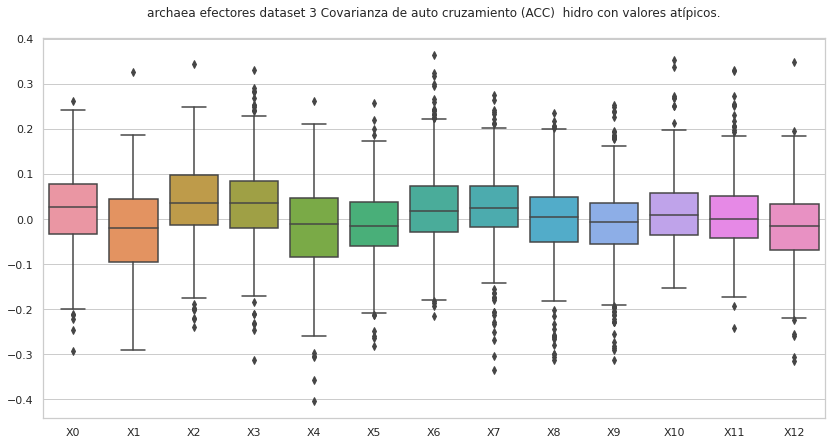

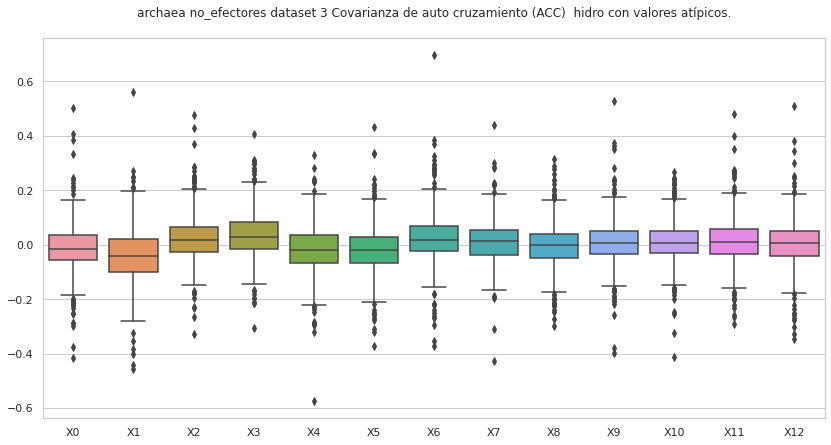

In [15]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  efectores archaea dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.001334 -0.078115  0.065274  0.059054 -0.148289  0.020244 -0.066984   
1   -0.209555 -0.165094  0.147335  0.109168 -0.132247 -0.013569  0.053576   
2    0.008769 -0.213234 -0.002806  0.128194 -0.084395 -0.096087  0.141392   
3    0.031119  0.011840  0.002290  0.084728  0.090296  0.085032 -0.005594   
4   -0.028848  0.118231 -0.197788 -0.077965 -0.162772  0.219492 -0.080919   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.086541  0.105521  0.169713  0.030004 -0.054771 -0.017605 -0.121119   
496 -0.110753 -0.126949 -0.009137  0.036818 -0.060854 -0.001347  0.112616   
497 -0.010647 -0.285446  0.014826  0.054012 -0.170633  0.002087  0.030357   
498 -0.060631 -0.073685 -0.017376  0.043008 -0.003854 -0.093078  0.072656   
499  0.004729  0.060127  0

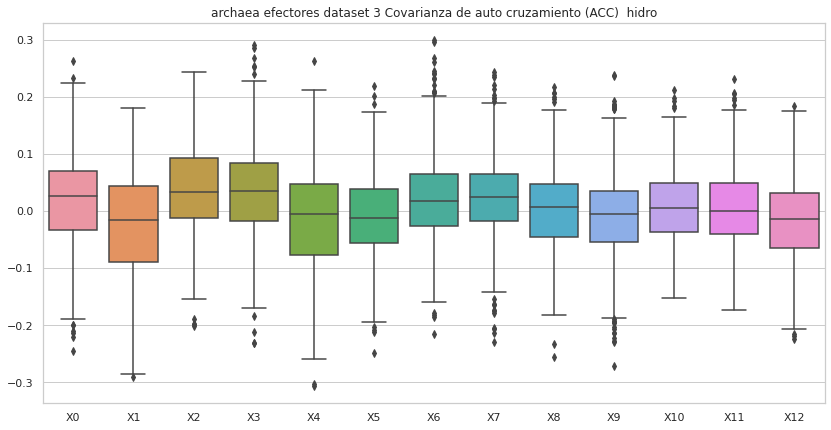

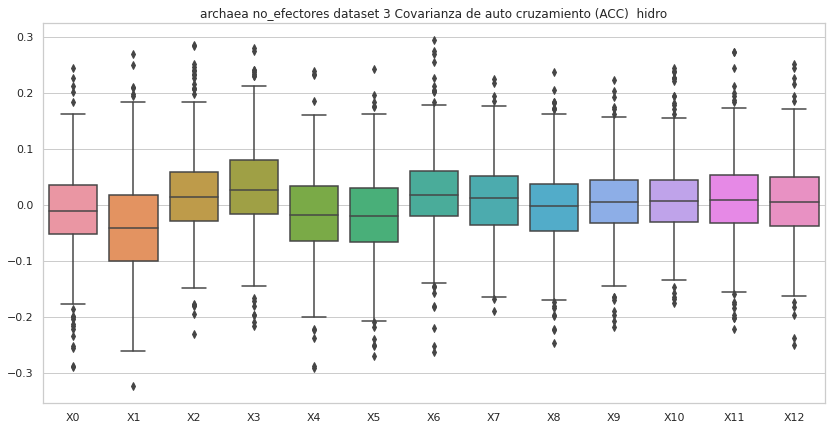

In [16]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))